In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
adv=pd.read_csv("advertising.csv")
housing =pd.read_csv("Housing.csv")
aviation=pd.read_csv("faa_ai_prelim.csv")

In [3]:
adv.info()
print('\n\n\n')
housing.info()
print('\n\n\n')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 

In [4]:
adv.sample(10)

,TV,Radio,Newspaper,Sales
41,177.0,33.4,38.7,17.1
132,8.4,27.2,2.1,5.7
142,220.5,33.2,37.9,20.1
27,240.1,16.7,22.9,20.9
25,262.9,3.5,19.5,17.0
180,156.6,2.6,8.3,15.5
146,240.1,7.3,8.7,18.2
175,276.9,48.9,41.8,27.0
123,123.1,34.6,12.4,15.2
1,44.5,39.3,45.1,10.4


In [5]:
housing.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
489,2835000,3300,3,1,2,no,no,no,no,no,1,no,semi-furnished
128,5873000,5500,3,1,3,yes,yes,no,no,yes,1,no,furnished
424,3360000,3100,3,1,2,no,no,yes,no,no,0,no,semi-furnished
463,3080000,3090,2,1,1,yes,yes,yes,no,no,0,no,unfurnished
326,3990000,4100,4,1,1,no,no,yes,no,no,0,no,unfurnished
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
304,4193000,8250,3,1,1,yes,no,yes,no,no,3,no,semi-furnished
145,5600000,5000,3,1,4,yes,no,no,no,no,0,no,furnished
106,6160000,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
330,3990000,4050,2,1,2,yes,yes,yes,no,no,0,yes,unfurnished


In [6]:
aviation.sample(10)

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,No,11-FEB-16,10-FEB-16,16:40:00Z,STURGIS,South Dakota,NaN,"AIRCRAFT ON TAXI, PROP STRUCK THE GROUND, STUR...",Accident,FAA Rapid City FSDO-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,No,09-FEB-16,08-FEB-16,00:00:00Z,EUGENE,Oregon,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, EUGENE, OR",Incident,FAA Portland FSDO-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,No,10-FEB-16,09-FEB-16,21:11:00Z,PEMBROKE PINES,Florida,NaN,"HK4699G COLUMBIA REGISTRATION, PIPER PA34 AIRC...",Incident,FAA Miami FSDO-19,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Yes,12-FEB-16,12-FEB-16,01:00:00Z,PETALUMA,California,NaN,"AIRCRAFT ON LANDING THE GEAR COLLAPSED, PETALU...",Incident,FAA Oakland FSDO-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,No,16-FEB-16,13-FEB-16,14:45:00Z,DAYTONA BEACH,Florida,NaN,"AIRCRAFT ON LANDING STRUCK A RUNWAY LIGHT, DAY...",Incident,FAA Orlando FSDO-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,No,08-FEB-16,06-FEB-16,15:36:00Z,EUREKA,Kansas,NaN,"AIRCRAFT LANDED GEAR UP, EUREKA, KS",Incident,FAA Wichita FSDO-64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,No,09-FEB-16,08-FEB-16,18:33:00Z,BILLINGS,Montana,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED AND STRUCK...",Accident,FAA Helena FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,No,11-FEB-16,11-FEB-16,00:17:00Z,TULARE,California,NaN,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,Accident,FAA Fresno FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,No,17-FEB-16,16-FEB-16,18:40:00Z,VERO BEACH,Florida,NaN,"AIRCRAFT ON DEPARTURE STRUCK A BIRD, RETURNED ...",Incident,FAA Orlando FSDO-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the datasets
adv = pd.read_csv("advertising.csv")
housing = pd.read_csv("Housing.csv")
aviation = pd.read_csv("faa_ai_prelim.csv")

def preprocess_dataset(df, drop_cols=None, encode_cols=None):
    df_clean = df.copy()
    if drop_cols:
        df_clean = df_clean.drop(columns=drop_cols, errors="ignore")
    num_cols = df_clean.select_dtypes(include=["number"]).columns
    cat_cols = df_clean.select_dtypes(exclude=["number", "bool"]).columns
    df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())
    df_clean[cat_cols] = df_clean[cat_cols].fillna("Missing")
    if encode_cols is not None:
        df_clean = pd.get_dummies(df_clean, columns=[col for col in encode_cols if col in df_clean.columns], drop_first=True)
    elif len(cat_cols) > 0:
        df_clean = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)
    for col in df_clean.columns:
        if df_clean[col].dtype == "bool":
            df_clean[col] = df_clean[col].astype(int)
    df_clean = df_clean.fillna(0)
    return df_clean

# Preprocess datasets
adv_preprocessed = preprocess_dataset(adv)
housing_preprocessed = preprocess_dataset(
    housing,None,
    encode_cols=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
)
aviation_preprocessed = preprocess_dataset(
    aviation,
    drop_cols=[
        "REGIST_NBR", "FLT_NBR", "RMK_TEXT", "UPDATED", "ENTRY_DATE",
        "EVENT_LCL_DATE", "EVENT_LCL_TIME", "LOC_CNTRY_NAME",
        "ACFT_MISSING_FLAG", "FAR_PART", "CBN_CRW_INJ_NONE", "CBN_CRW_INJ_MINOR",
        "CBN_CRW_INJ_SERIOUS", "CBN_CRW_INJ_FATAL", "CBN_CRW_INJ_UNK",
        "GRND_INJ_NONE", "GRND_INJ_MINOR", "GRND_INJ_SERIOUS", "GRND_INJ_FATAL", "GRND_INJ_UNK"
    ]
)


In [8]:
print(housing_preprocessed.shape)
housing_preprocessed.sample(5)

(545, 14)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
462,3080000,2160,3,1,2,0,0,0,1,0,0,0,1,0
490,2835000,4350,3,1,2,1,0,0,0,1,0,0,0,1
213,4893000,4995,4,2,1,0,1,0,1,0,0,0,1,0
137,5740000,4640,4,1,2,1,1,0,0,0,0,0,1,0
334,3920000,3290,2,1,1,1,1,0,0,1,0,0,0,0


In [9]:
print(aviation_preprocessed.shape)
aviation_preprocessed.sample(5)

(83, 276)


,FLT_CRW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,...,FLT_PHASE_Missing,FLT_PHASE_STANDING (STD),FLT_PHASE_TAKEOFF (TOF),FLT_PHASE_TAXI (TXI),FLT_PHASE_UNKNOWN (UNK),MAX_INJ_LVL_Minor,MAX_INJ_LVL_Missing,MAX_INJ_LVL_Serious,MAX_INJ_LVL_Unknown,FATAL_FLAG_Yes
49,2.00000,1.333333,3.0,1.5,0.0,1.823529,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
69,1.00000,1.333333,3.0,1.5,0.0,2.000000,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
23,1.21875,1.333333,3.0,1.5,0.0,1.823529,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,0
0,1.21875,1.333333,3.0,1.0,0.0,1.823529,1.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
61,1.21875,1.000000,3.0,1.5,0.0,1.823529,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
import numpy as np

def reconstruction_error(X, n_components_list):
    mu = np.mean(X, axis=0)
    A = X - mu
    C = np.dot(A.T, A)
    eigenvals, eigenvecs = np.linalg.eig(C)

    # Sort by descending eigenvalue
    idx = np.argsort(eigenvals)[::-1]
    eigenvecs = eigenvecs[:, idx]

    error = []
    for n in n_components_list:
        E = eigenvecs[:, :n]
        W = np.dot(A, E)
        R = np.dot(W, E.T) + mu
        err = np.sum((X - R) ** 2).real
        error.append(err)
    return error


In [11]:
scaler = StandardScaler()
adv_scaled = scaler.fit_transform(adv_preprocessed)
housing_scaled = scaler.fit_transform(housing_preprocessed)
aviation_scaled = scaler.fit_transform(aviation_preprocessed)

n_list = [1, 2, 3, 5, 7, 10, 15]
adv_errors = reconstruction_error(adv_scaled, n_list)
housing_errors = reconstruction_error(housing_scaled, n_list)
aviation_errors = reconstruction_error(aviation_scaled, n_list)


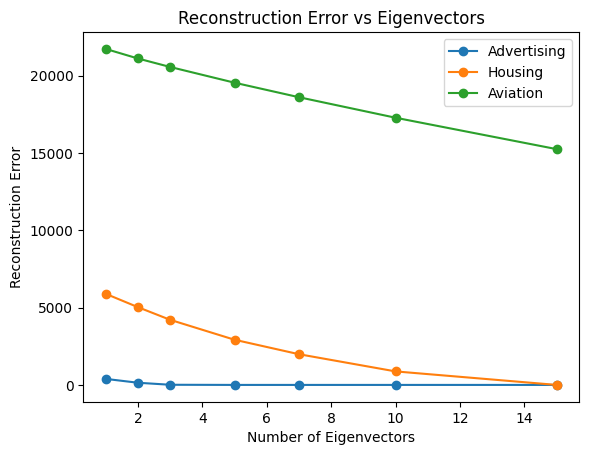

In [12]:
import matplotlib.pyplot as plt

plt.plot(n_list, adv_errors, marker='o', label="Advertising")
plt.plot(n_list, housing_errors, marker='o', label="Housing")
plt.plot(n_list, aviation_errors, marker='o', label="Aviation")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.title("Reconstruction Error vs Eigenvectors")
plt.show()
